In [1]:
######################### TRUMP TWEETS ########################

# Our work on PyrSpark aims at a better understanding of the Twitter behaviour of 
# Donald Trump the president of the United States of America.


In [2]:
# Firstly we have imported our data base called Working with Key Value RDD Trump_Tweets 
# and printed one text to check what a tweet there would look like.

In [3]:
import pyspark

sc = pyspark.SparkContext(appName="Working with Key Value RDD Trump_Tweets")

In [4]:
rdd_Trump = sc.textFile('trump_tweets.txt')

In [5]:
rdd_Trump.take(1)

['Republicans and Democrats have both created our economic problems.;02/08/2011 18:07:48']

In [6]:
## To make the data easier to manipulate we have decided to lower all the letters in tweets
# This step enabled us to get rid of doubles or even even some wors that could have been 
# also written in all caps. We've printed those after to check that everything was correct 

In [7]:
rdd_Trump.map( lambda word: ( word.lower(), 1 ) ).take(10)

[('republicans and democrats have both created our economic problems.;02/08/2011 18:07:48',
  1),
 ('i was thrilled to be back in the great city of charlotte, north carolina with thousands of hardworking american patriots who love our country, cherish our values, respect our laws, and always put america first! thank you for a wonderful evening!! #kag2020 https://t.co/dnjzfrsl9y;03/03/2020 01:34:50',
  1),
 ('rt @cbs_herridge: read: letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho…;17/01/2020 03:22:47',
  1),
 ('the unsolicited mail in ballot scam is a major threat to our democracy, &amp  the democrats know it. almost all recent elections using this system, even though much smaller &amp   with far fewer ballots to count, have ended up being a disaster. large numbers of missing ballots &amp  fraud!;12/09/2020 20:10:58',
  1),
 ("rt @mzhemingway: very friendly telling of events here about comey's apparent leaking to compli

In [8]:
rdd_Trump_lowered = rdd_Trump.map(lambda word: word.lower())

In [9]:
# The total amount of tweet in our data base is of 58 681.

In [10]:
rdd_Trump_lowered.count()

58681

In [11]:
# We used this utility function parsing a line of our file and return a tuple containing
# the tweet, the date and hour

def parse_Trump_line(line):
    subs = '</title><text>'
    i = line.find(subs)
    title = line[14:i]
    text = line[i+len(subs):len(line)-16]
    return (title, text)

parse_Trump_line(rdd_Trump_lowered.take(1)[0])

('d democrats have both created our economic problems.;02/08/2011 18:07:4',
 'nd democrats have both created our economic problems.;02/')

In [12]:
# We used the utility function to split each line into individual words by using multiple separators

import re

def split_with_multiple_separator(string_value):
    return re.split('#|,| |\[|\]', string_value.strip())

split_with_multiple_separator(rdd_Trump_lowered.take(1)[0])

['republicans',
 'and',
 'democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems.;02/08/2011',
 '18:07:48']

In [13]:
# As seen in class, we've computed an rdd with individual words (rdd_Trump_lowered_words) from the rdd_Trump_lowered by using the previous function

rdd_Trump_lowered_words = rdd_Trump_lowered.flatMap(split_with_multiple_separator).filter(lambda word: word!='')

rdd_Trump_lowered_words.take(5)

['republicans', 'and', 'democrats', 'have', 'both']

In [14]:
# This action has been successful since any of these are containing empty strings

In [15]:
#  We have then initialized an rdd with key/value for counting each word in the file 

rdd_Trump_lowered_words_kv = rdd_Trump_lowered_words.map(lambda word: (word, 1))

rdd_Trump_lowered_words_kv.take(5)

[('republicans', 1), ('and', 1), ('democrats', 1), ('have', 1), ('both', 1)]

In [16]:
###### As a third step we've extracted top positives words from tweets

In [17]:
rdd_positive_words = sc.textFile('positive-words.txt')

rdd_positive_words.take(5)

['a+', 'abound', 'abounds', 'abundance', 'abundant']

In [18]:
# We've initialized an rdd with key/value for counting each positive word in the file 

rdd_positive_words_kv = rdd_positive_words.map(lambda word: (word, 1))

rdd_positive_words_kv.take(5)

[('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1), ('abundant', 1)]

In [19]:
rdd_positive_words_Trump_kv = rdd_Trump_lowered_words_kv.join(rdd_positive_words_kv)

rdd_positive_words_Trump_kv.take(5)


[('thrilled', (1, 1)),
 ('thrilled', (1, 1)),
 ('thrilled', (1, 1)),
 ('thrilled', (1, 1)),
 ('thrilled', (1, 1))]

In [20]:
# We then used the mapValues transformation to assign a default count of one for each positive word

rdd_positive_words_Trump_kv = rdd_positive_words_Trump_kv.mapValues(lambda tuple: 1)

rdd_positive_words_Trump_kv.take(5)

[('thrilled', 1),
 ('thrilled', 1),
 ('thrilled', 1),
 ('thrilled', 1),
 ('thrilled', 1)]

In [21]:
# We have then computed the amount of occurences to be able to handle the datas

rdd_positive_words_Trump_count_kv = rdd_positive_words_Trump_kv.reduceByKey(lambda x,y : x+y)


rdd_positive_words_Trump_count_kv.take(5)

[('thrilled', 46),
 ('wonderful', 465),
 ('right', 727),
 ('sustainable', 1),
 ('best', 1113)]

In [22]:
# rdd_positive_words_Trump_count_kv_ordered contains the previous RDD in descending order based on the count
# These information allow us to get a first overall idea of the general kind of vocabulary used
# It also provides information about the personna

rdd_positive_words_Trump_count_kv_ordered = rdd_positive_words_Trump_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion = rdd_positive_words_Trump_count_kv_ordered.take(25)

list_top_positives_opinion

[('great', 6669),
 ('trump', 4795),
 ('thank', 3424),
 ('like', 1973),
 ('good', 1602),
 ('love', 1116),
 ('best', 1113),
 ('work', 792),
 ('win', 752),
 ('right', 727),
 ('better', 690),
 ('strong', 666),
 ('well', 564),
 ('congratulations', 549),
 ('support', 544),
 ('happy', 530),
 ('amazing', 472),
 ('wonderful', 465),
 ('honor', 412),
 ('nice', 400),
 ('beautiful', 391),
 ('important', 385),
 ('incredible', 355),
 ('fantastic', 347),
 ('greatest', 338)]

In [23]:
# We have then done the same operations regarding the negative words. 

In [24]:
rdd_negative_words = sc.textFile('negative-words.txt')

rdd_negative_words.take(5)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']

In [25]:
rdd_negative_words_kv = rdd_negative_words.map(lambda word: (word, 1))

rdd_negative_words_kv.take(5)

[('2-faced', 1),
 ('2-faces', 1),
 ('abnormal', 1),
 ('abolish', 1),
 ('abominable', 1)]

In [26]:
rdd_negative_words_Trump_kv = rdd_Trump_lowered_words_kv.join(rdd_negative_words_kv)

In [27]:
rdd_negative_words_Trump_kv = rdd_negative_words_Trump_kv.mapValues(lambda tuple:1)

rdd_negative_words_Trump_kv.take(10)

[('threat', 1),
 ('threat', 1),
 ('threat', 1),
 ('threat', 1),
 ('threat', 1),
 ('threat', 1),
 ('threat', 1),
 ('threat', 1),
 ('threat', 1),
 ('threat', 1)]

In [28]:
rdd_negative_words_Trump_count_kv = rdd_negative_words_Trump_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_Trump_count_kv.take(5)

[('threat', 72),
 ('dishonest', 169),
 ('lost', 323),
 ('fraud', 127),
 ('killed', 159)]

In [29]:
rdd_negative_words_Trump_count_kv_ordered = rdd_negative_words_Trump_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion = rdd_negative_words_Trump_count_kv_ordered.take(25)

list_top_negatives_opinion

[('fake', 1191),
 ('bad', 831),
 ('hard', 654),
 ('crime', 455),
 ('crooked', 435),
 ('illegal', 384),
 ('radical', 381),
 ('lost', 323),
 ('corrupt', 317),
 ('terrible', 307),
 ('collusion', 278),
 ('wrong', 273),
 ('miss', 269),
 ('attack', 249),
 ('failing', 248),
 ('failed', 246),
 ('worst', 244),
 ('phony', 219),
 ('weak', 208),
 ('badly', 201),
 ('crazy', 199),
 ('problem', 190),
 ('hoax', 183),
 ('hate', 183),
 ('destroy', 175)]

In [30]:
## Visualization of polarized opinions from Tweets

In [31]:
# the utility function plot_opinion plots a bar chart presenting top positives and top negatives words
# the parameters are list of tuples containing counts from positives and negatives words

from matplotlib import pyplot as plt
import seaborn as sb

import pandas as pd

def plot_opinion(list_positives, list_negatives):
    
    list_1 = [(t[0], t[1], 'positive') for t in list_positives]
    list_2 = [(t[0], t[1], 'negative') for t in list_negatives]
    
     
    list_1.extend(list_2)
    
    
    pd_df = pd.DataFrame({
     'Opinion': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
     'polarity': [ t[2] for t in list_1 ]
    }).sort_values('Count', ascending=False)
    
    pd_df['color'] = pd_df.polarity.apply(lambda polarity: 'green' if polarity=='positive' else 'red')
    
    plt.figure( figsize = (15, 8) )
    chart=sb.barplot(data=pd_df, x='Opinion', y='Count', hue='polarity', palette=["green", "red"], order=pd_df['Opinion'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )
    
    for tick, color in zip(chart.get_xticklabels(), pd_df['color']): 
        tick.set_color(color)
    
    plt.show()

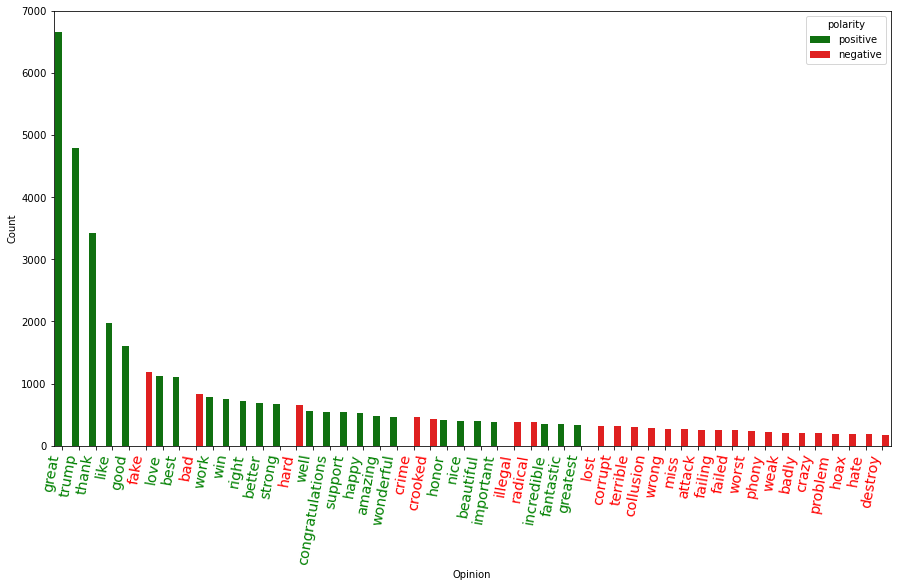

In [32]:
plot_opinion(list_top_positives_opinion, list_top_negatives_opinion)

In [33]:
## As a first obsession, xwe are not so surprised about the word "great" making it to the top of the list
# Indeed, great is part of it's catch phrase of the elections "Make America Great Again". However, the word "Trump" seems to be more there because of it being it's last name than because of the adjective "Trump
# Fake seems to go one in hand with it's recurrent allegations to "Fake News", it is no surprise that this one that he uses to defend hisself and political partee is the one making it to the impressing amount of simple positive words.
# The crime, croocked and illegal words seem to be referending to the past elections.

In [34]:
# Step 5: Visualizing contextual words from product reviews

In [35]:
# we read our stop words

rdd_stop_words = sc.textFile('stop-words.txt')

rdd_stop_words.take(25)

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any']

In [36]:
# We have then computed the neutral/contextual words RDD by using rdd_product_words, rdd_positive_words, rdd_negative_words and rdd_stop_words


contextual_words = rdd_Trump_lowered_words.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)


contextual_words.take(10)

['action',
 'action',
 'action',
 'action',
 'action',
 'action',
 'action',
 'action',
 'action',
 'action']

In [37]:
contextual_words_count_ordered = contextual_words.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words = contextual_words_count_ordered.take(50)  

list_top_contextual_words

[('@realdonaldtrump', 8809),
 ('rt', 7902),
 ('&amp', 5437),
 ('president', 3563),
 ('just', 3238),
 ('people', 2833),
 ('new', 2419),
 ('big', 1853),
 ('make', 1797),
 ('america', 1734),
 ('"rt', 1579),
 ('democrats', 1546),
 ('time', 1529),
 ('country', 1524),
 ('obama', 1457),
 ('going', 1453),
 ('donald', 1414),
 ('news', 1389),
 ('want', 1371),
 ('american', 1359),
 ('vote', 1321),
 ('need', 1165),
 ('u.s.', 1133),
 ('today', 1116),
 ('@realdonaldtrump:', 1089),
 ('think', 1073),
 ('really', 1067),
 ('run', 1058),
 ('doing', 1047),
 ('did', 1017),
 ('know', 986),
 ('media', 972),
 ('said', 947),
 ('job', 940),
 ('china', 925),
 ('years', 914),
 ('thanks', 887),
 ('way', 879),
 ("don't", 868),
 ('united', 854),
 ('house', 849),
 ('biden', 830),
 ('got', 825),
 ('state', 820),
 ('total', 807),
 ('day', 805),
 ('jobs', 805),
 ('hillary', 796),
 ('look', 784),
 ('states', 782)]

In [38]:
# We've plotted the contextual words bar chart presenting top contextual words
# the parameter are list of tuples containing counts from contextual words

def plot_contextual_words(list_contextual_words):


    pd_df = pd.DataFrame({
        'Word':  [ t[0] for t in list_contextual_words ],
        'Count': [ t[1] for t in list_contextual_words ]
    }).sort_values('Count', ascending=False)
    
    plt.figure( figsize = (15, 8) )
    
    chart=sb.barplot(data=pd_df, x='Word', y='Count', order=pd_df['Word'], color='blue')
    
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=80, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large',
        )
   
    plt.show()

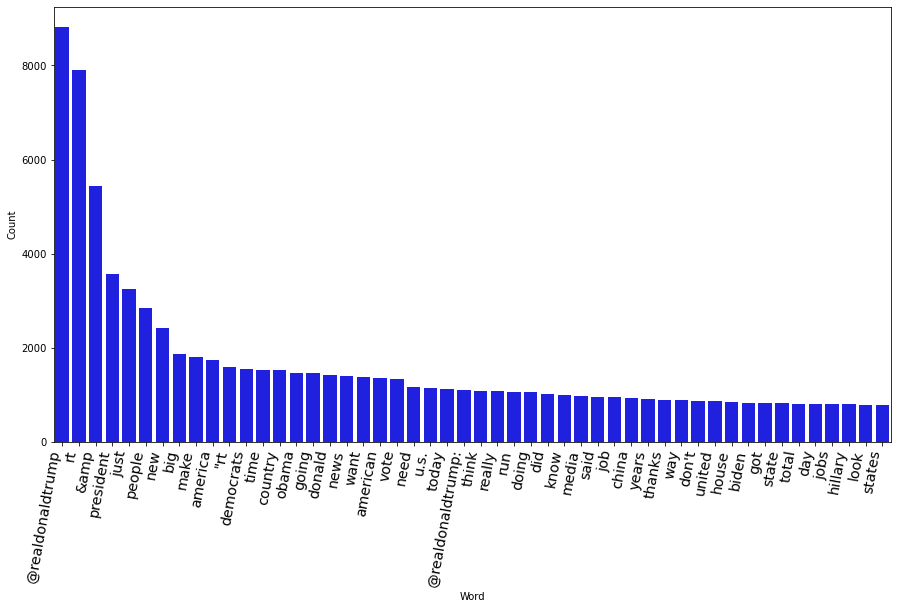

In [39]:
plot_contextual_words(list_top_contextual_words)    

In [40]:
# We can see that the slogan is part of the words. The @realdonaldtrump, rt (retweet) and so on shows that
# The former president is using it's platform to interact with his audience and the democrats are behind quite a target with Obama, Hilary and China

In [41]:
# Step 6: Computing the global sentiment/opinion score 

In [42]:
# Compute the global sentiment score: the total count of positive words (e.g. use rdd_positive_words_product_count_kv) minus
# the total count of negative words (e.g. use rdd_negative_words_product_count_kv)


sentiment_score = rdd_positive_words_Trump_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_Trump_count_kv.map(lambda tuple: tuple[1]).sum()

In [43]:
print('The sentiment score is : ',sentiment_score)

The sentiment score is :  22070


In [44]:
# The sentiment score of this analysis is impressingly high.

In [45]:
# Wordcloud

In [46]:
!pip install wordcloud

In [47]:
from pyspark.sql import SparkSession
from wordcloud import WordCloud, STOPWORDS

In [48]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


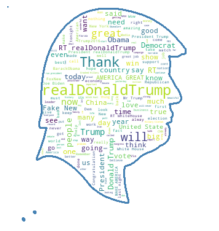

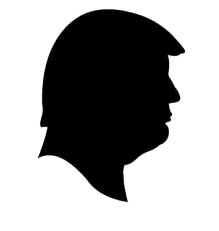

In [49]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname('trump_tweets.txt')

# Read the whole text.
text = open(path.join(d, 'trump_tweets.txt')).read()

trump_mask = np.array(Image.open(path.join(d, "6.png")))

# read the mask / color image taken from
trump_coloring = np.array(Image.open(path.join(d, "6.png")))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("co")
stopwords.add("t")
stopwords.add("amp")

wc = WordCloud(background_color="white", max_words=1000,mask=trump_mask,
               stopwords=stopwords, max_font_size=40, contour_width=3, contour_color='steelblue')
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(trump_coloring)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(trump_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


In [50]:
#Hashtags (#) and tags (@)

In [51]:
rdd_Trump_lowered.filter(lambda word : word.startswith('#')).take(50) 


['#ga…";13/04/2020 00:33:38',
 '#trumppence2020 #kag2020 https://t.co/gegmunszoj";02/03/2020 02:28:50',
 '#bidencrimefamiily;30/10/2020 06:37:17',
 '#vote #maga";30/10/2020 19:03:33',
 '#maga #election2020 ',
 '#electionday #maga🇺🇸 https://t.co/j5f8vnzypi";31/10/2020 14:49:31',
 '#electionday #maga🇺🇸 ',
 '#election2020 #maga🇺🇸 https://t.co/5eyxihjfib";31/10/2020 23:51:29',
 '#latinosfortrump https://t.co/4vbxieiten";01/11/2020 18:27:57',
 '#linemen for @realdonaldtrump https://t.co/1apu11eisa";03/11/2020 01:49:49',
 '#trumpadvice http://t.co/u83adntvvp;13/11/2014 21:54:53',
 '#trumpvlog obama should be ashamed! http://t.co/gcugltxyzn;24/10/2014 15:30:38',
 '#trumpadvice https://t.co/fox2rhnxha;06/05/2015 21:47:01',
 '#imwithyou https://t.co/i8dhzezmy4;03/09/2016 11:39:03',
 '#americafirst #rncincle https://t.co/pvdta8htcc;21/07/2016 00:50:21',
 '#flashbackfriday #crookedhillary https://t.co/pvrbb7v4ng;10/06/2016 19:27:13',
 '#caucusfortrump #trump2016  https://t.co/ptuldxgpkp;05/03/201

In [52]:
rdd_Trump_lowered.filter(lambda word : word.startswith('#')).count() 

484

In [53]:
# The hashtag being used are one that would incite people to participate and create an online debate.

In [54]:
rdd_Trump_lowered.filter(lambda word : word.startswith('@')).take(50)

['@realdona…";25/10/2020 05:03:00',
 '@maggienyt  there has never been a time in either of my two campaigns when i felt we had a stronger chance of winning than we do right now. early voting reports look far stronger than originally anticipated. every rally is boffo. @markmeadows &amp  team are doing a fantastic job....;19/10/2020 17:27:21',
 '@garypeters\' radical left policies would hurt michiganders. if peters wins, michigan loses. https://t.co…";24/10/2020 15:55:40',
 '@realdonaldtrump is saying the best is yet to come!',
 '@joebiden was the committee chairman who launched the “high-tech lynching” against then judge clarence thom…";27/10/2020 11:09:40',
 '@rebaforever58   yes.;19/05/2013 16:23:05',
 '@sbowlin1  thanks--you will love it.;30/11/2012 17:18:54',
 "@revrome83 @celebapprentice @bretmichaels you won't be disappointed!;30/11/2012 17:18:12",
 '@wandasalley  thanks--have fun!;28/12/2012 20:36:56',
 '@bf2088 thanks--and good luck.;05/12/2012 14:23:18',
 '@michaelrubinton work

In [55]:
rdd_Trump_lowered.filter(lambda word : word.startswith('@')).count() 

2613

In [56]:
#  The people the former president has been talking to are more frequently random persons more than actual legit institutions or even just to announce big things
# He is really taking his voters importance since he takes to time to thank a lot of persons. 

In [57]:
# The amount of @ against # shows that he is more likely to interact with persons than talk about subject with personnalized hashtags.